#**Data analysis and Preprocessing:**
I'll first be checking what's in the file, how are the dataset being made and how to implement the knowledge to find the result.

In [199]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [200]:
!wget -O ExistingEmpData.csv https://raw.githubusercontent.com/sdikshant89/Minor_Proj_Codepth/master/Existing%20employees.csv
!wget -O LeftEmpData.csv https://raw.githubusercontent.com/sdikshant89/Minor_Proj_Codepth/master/Employees%20left.csv

--2020-06-23 11:16:48--  https://raw.githubusercontent.com/sdikshant89/Minor_Proj_Codepth/master/Existing%20employees.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470984 (460K) [text/plain]
Saving to: ‘ExistingEmpData.csv’

ExistingEmpData.csv 100%[===================>] 459.95K  --.-KB/s    in 0.06s   

2020-06-23 11:16:48 (6.93 MB/s) - ‘ExistingEmpData.csv’ saved [470984/470984]

--2020-06-23 11:16:50--  https://raw.githubusercontent.com/sdikshant89/Minor_Proj_Codepth/master/Employees%20left.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [201]:
exist_df = pd.read_csv("ExistingEmpData.csv")
left_df = pd.read_csv("LeftEmpData.csv")

In [202]:
exist_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [203]:
left_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [204]:
exist_df["dept"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [205]:
# checking the number of employees per department
exist_df["dept"].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: dept, dtype: int64

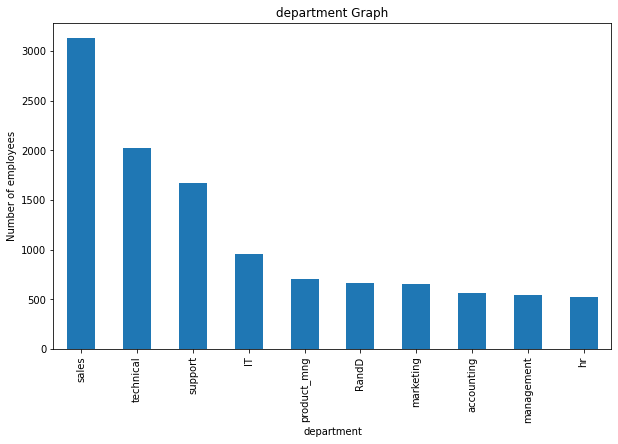

In [206]:
exist_df["dept"].value_counts().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('department') # add to x-label to the plot
plt.ylabel('Number of employees') # add y-label to the plot
plt.title('department Graph') # add title to the plot
plt.show()

In [207]:
# checking the number of employees per department
left_df["dept"].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

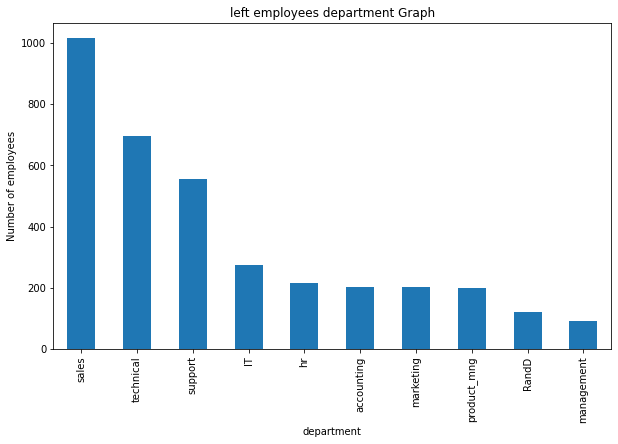

In [208]:
left_df["dept"].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('department') # add to x-label to the plot
plt.ylabel('Number of employees') # add y-label to the plot
plt.title('left employees department Graph') # add title to the plot
plt.show()

In [209]:
left_df["dept"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

**In the above code(using the left employee dataframe) we get to know that there isn't any ONE type of department where the company is firing its employees**

In [210]:
total_rows = exist_df.count()
print(total_rows)

Emp ID                   11428
satisfaction_level       11428
last_evaluation          11428
number_project           11428
average_montly_hours     11428
time_spend_company       11428
Work_accident            11428
promotion_last_5years    11428
dept                     11428
salary                   11428
dtype: int64


In [211]:
exist_df.shape

(11428, 10)

In [212]:
status = [1]*11428

In [213]:
exist_df['Status'] = status

**Here I made another column to the table of employees existing in the company(with the status of whether they are in the company or not(values = 1(true) that means they aren't fired))**

**Similarly we'll be doing it with the table of employees which are being fired(here we'll assign the value 0(false) that means they are no longer in the company and are fired)**

In [214]:
left_df.shape

(3571, 10)

In [215]:
status_left = [0]*3571

In [216]:
left_df['Status'] = status_left

In [217]:
left_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Status
0,1,0.38,0.53,2,157,3,0,0,sales,low,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,0
2,3,0.11,0.88,7,272,4,0,0,sales,medium,0
3,4,0.72,0.87,5,223,5,0,0,sales,low,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,0


In [218]:
exist_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1


**Now we have to find what is/are the reasons because of which the people are leaving the organization. Thats why the two tables first have to be combined to form 1 database on which we'll be doing the operations.**

**For the two different entries from both the table I assigned another table named "Status" which will be telling if the person left(value = 0) or is still working(value = 1)**

In [219]:
df = pd.concat([exist_df, left_df])
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1


In [220]:
df.shape

(14999, 11)

**So here I made the one dataframe we'll be working on which is "df" including rows/entries of both the tables**

In [221]:
cdf = df.sort_values(by = 'Emp ID', axis=0, ascending=True)

**Here we get our new dataframe sorted w.r.t Employee ID**

In [222]:
cdf.isnull().sum().sum()

0

**We checked if there were any Na/NaN values in the dataset or not**

In [223]:
cdf["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

#**Correlation:**
So we've worked with our dataset, have seen what values does each column/attributes possess so now we'll have to make a model good/precise enough to predict if the other employees would leave the organization or not.

So now to build a model we'll have to see the correlation between all the parameters(or attributes or columns) and the target variable i.e. status(which is '***1***' is the employee is still working and '***0***' if the employee left).

while finding the correlation we'll be getting 2 values that are ***correlation coefficient ***and ***P-Value***. 

If the correlation coefficient value is close to:

- **+1** (large positive correlation)
- **-1** (large negative correlation)
- **0** (no relationship)

Similarly if the P-value is:

- **<0.001** (strong certainty)
- **<0.05** (moderate certainty)
- **<0.1** (weak certainty)
- **>0.1** (no certainty)

In [224]:
import scipy.stats

In [225]:
cdf.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Status'],
      dtype='object')

In [226]:
scipy.stats.pearsonr(cdf['satisfaction_level'], cdf['Status'])

(0.38837498342411414, 0.0)

In [227]:
scipy.stats.pearsonr(cdf['last_evaluation'], cdf['Status'])

(-0.006567120447534094, 0.4212701963736362)

**here P-value is >0.1 i.e. there is no certainity and value of coefficient is almost equal to 0 so there is no relation**

In [228]:
scipy.stats.pearsonr(cdf['number_project'], cdf['Status'])

(-0.023787185071774138, 0.0035752138709411125)

In [229]:
scipy.stats.pearsonr(cdf['average_montly_hours'], cdf['Status'])

(-0.07128717878330126, 2.3113035567530147e-18)

In [230]:
scipy.stats.pearsonr(cdf['time_spend_company'], cdf['Status'])

(-0.1448221749393853, 4.2076804576938825e-71)

In [231]:
scipy.stats.pearsonr(cdf['Work_accident'], cdf['Status'])

(0.15462163370513557, 6.613049400438366e-81)

In [232]:
scipy.stats.pearsonr(cdf['promotion_last_5years'], cdf['Status'])

(0.061788106579200294, 3.624047224141857e-14)

**From finding the above values we see that mostly all values have coefficient values somewhere around zero but not zero(so they compete in themselves) but here P-Value also matters which are acceptable for these attributes aas some have very prominent values such as values produced by columns like average monthly hours, time spent in the company etc. So instead of simply ignoring them we can use all of them to make our model, it would hardly make any difference in accuracy**

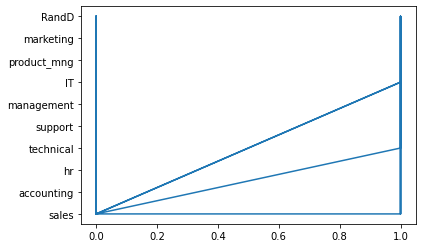

In [233]:
plt.plot(cdf['Status'], cdf['dept'])

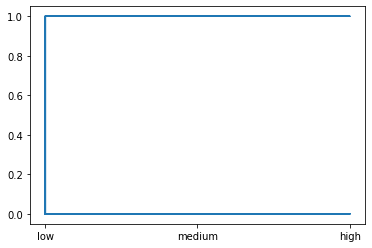

In [234]:
plt.plot(cdf['salary'], cdf['Status'])

**Plot was made for these 2 attributes because Pearson's correlation cannot find values with columns having non numeric data**

#**Feature Selection:**
correlation didn't give us that much information as we expected so instead of that we can use feature selection method in which we'll find out which of the atributes/columns participate most in the change in the value of **Status** on an employee.

###**Univariate Selection:**
here we use some statistical tests to see which of the attributes/ columns have the highest or the most impact to the target variable. we'll impliment it by using the **scikit-learn library** with the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the **chi-squared (chi²)** statistical test.

In [235]:
cdf["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [236]:
cdf["salary"].replace({'low':1,'medium':2,'high':3}, inplace = True)

In [237]:
cdf["dept"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [238]:
cdf["dept"].replace({'sales':1, 'technical':2, 'support':3,  'IT':4, 'product_mng':5, 'marketing':6,
                     'RandD':7, 'accounting':8, 'hr':9, 'management':10}, inplace = True)

In [239]:
cdf.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Status'],
      dtype='object')

In [240]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

cdf_bestx = cdf[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']]

cdf.besty = cdf[['Status']]

bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(cdf_bestx,cdf.besty)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(cdf_bestx.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 9 best features

                   Specs       Score
3   average_montly_hours  945.588933
5          Work_accident  306.737710
0     satisfaction_level  228.193183
4     time_spend_company  191.708547
8                 salary   95.199142
6  promotion_last_5years   56.044865
7                   dept   24.831690
2         number_project    3.390205
1        last_evaluation    0.026464


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


###**Feature Importance:**
Feature importance is an inbuilt class that comes with **Tree Based Classifiers** here we simply get the scores which determines/selects which of the attribute/column has the most affect to the change in the target variable.

In [241]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(cdf_bestx,cdf.besty)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.25 0.14 0.24 0.14 0.17 0.02 0.   0.02 0.02]


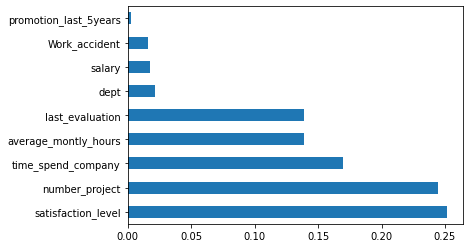

In [242]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=cdf_bestx.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#**Logistic regression:**
It is the best machine learning technique used to predict the outcome where classification type is binary. 

###**Train/Test datasets:**

In [243]:
cdf.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Status'],
      dtype='object')

In [244]:
x = np.asarray(cdf[['satisfaction_level', 'last_evaluation', 'number_project',
                    'average_montly_hours', 'time_spend_company', 'Work_accident',
                     'promotion_last_5years','dept', 'salary']])
x[0:5]

array([[3.80e-01, 5.30e-01, 2.00e+00, 1.57e+02, 3.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00],
       [8.00e-01, 8.60e-01, 5.00e+00, 2.62e+02, 6.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 2.00e+00],
       [1.10e-01, 8.80e-01, 7.00e+00, 2.72e+02, 4.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 2.00e+00],
       [7.20e-01, 8.70e-01, 5.00e+00, 2.23e+02, 5.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00],
       [3.70e-01, 5.20e-01, 2.00e+00, 1.59e+02, 3.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00]])

**For the innitial stage I've used all the variables for X except Status(Y) and the unique Employee ID ofcourse. This is because the accuracy of model is differing from 0.1% after every stage of removal of an attribute/column So instead I'll be using all the 9 columns for to predict the data**

In [245]:
y = np.asarray(cdf['Status'])
y[0:10000]

array([0, 0, 0, ..., 1, 1, 1])

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (11999, 9) (11999,)
Test set: (3000, 9) (3000,)


**We now divided the dataset into 4 different sets 2 for training and 2 for testing. Testing sets are 20% of the whole dataset while the other 80% is used to train the model. In train and test we have separated it with variables of X and Y where Y is the dependent variable while X is independent**

###**Creating the model:**

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
# we have the actual results as y_test but lets first see what output
# does the model generates. here ynot is the value it generates using x_test
ynot = LR.predict(x_test)
ynot[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [249]:
ynot_prob = LR.predict_proba(x_test)
ynot_prob

array([[0.13, 0.87],
       [0.41, 0.59],
       [0.21, 0.79],
       ...,
       [0.34, 0.66],
       [0.28, 0.72],
       [0.26, 0.74]])

The above code provides us with the probablity of each entry(x_test) to be **0(ie employee left)** which is at **0th** index of every row and **1(employee still there)** which is at **1st** index of every row

#**Model Evaluation(accuracy check):**

###**Jaccard Index:**
The Jaccard index, also known as Intersection over Union and the Jaccard similarity coefficient, is a statistic used for gauging the similarity and diversity of sample sets.
In simple words we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is **1.0**; otherwise it is **0.0**.

In [250]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, ynot)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7726666666666666

###**log loss:**
In logistic regression, the output can be the probability of employee staying in the company or not. This probability is a value between 0 and 1.
Log loss(Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between **0 and 1**. 

**Lesser** the value of log loss better is the machine learning model. Goal should be of reaching the minimum of log loss for the model to perform well. Like a model with log loss as **0** will be having **100%** accuracy.


In [251]:
from sklearn.metrics import log_loss
log_loss(y_test, ynot_prob)

0.4477063106471834

###**Confusion Matrix:**
It is the best way to look out for accuracy of a classifier.

In [252]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, ynot, labels=[1,0]))

[[2211   76]
 [ 606  107]]


Confusion matrix, without normalization
[[2211   76]
 [ 606  107]]


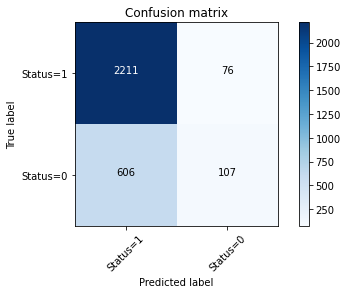

In [253]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, ynot, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Status=1','Status=0'],normalize= False,  title='Confusion matrix')

In the above diagram we see that the total number of employees having the value 1(that means they are still working in the company) in the test set would be total of 2287.
This shows that 2211 employees who are actually there in the company are predicted correctly by the classifier. that means for these 2211 employees ynot value and y_test values are the same. while on the other hand y_test(actual label) of 76 employees were 1 but was predicted 0(wrong) by the model/classifier.
Now on the other hand it went pretty wrong where in the 2nd row the correct prediction of the once who are not in the company anymore were 107 but actually wrong prediction was 606.

**From this we come to a conclusion that the model was good enough in predicting the employees where the Status value is 1(i.e. employees who are still working in the company).**

###**F1-Score:**
last but not the least we see the F1-score.
below is the formula:

**Precision** = TP/(TP+FP)

**Recall** = TP/(TP+FN)

**F1** = (2x(precision x recall))/(precision + recall)

here recall is the true positive rate while precision is a measure of the accuracy provided that a class label has been predicted.

**(Least accuracy)0 < F1-Score < 1(Highest/most accurate)**

In [254]:
print (classification_report(y_test, ynot))

              precision    recall  f1-score   support

           0       0.58      0.15      0.24       713
           1       0.78      0.97      0.87      2287

    accuracy                           0.77      3000
   macro avg       0.68      0.56      0.55      3000
weighted avg       0.74      0.77      0.72      3000



**Before selecting all the attributes to be the part of making a model, choosing which once to consider and which once not to consider was a challenging task in itself. But what is not being shown in this file is that I tried to make the model with more accuracy and removing or adding any perticular attribute/column was resulting in 0.1% change in accuracy which was not that significant so I just selected all the columns except the Status(Y) and the Employee ID.**